In [1]:
import os
import sys

import pandas as pd
from datetime import datetime as dt
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

import collections
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag

import scipy.stats as ss
import matplotlib.pyplot as plt
import math

import re
from nltk.corpus import stopwords

from sklearn.manifold import MDS

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [2]:
path_to_driver = os.getcwd() + "\\chromedriver"
sys.path.insert(0,path_to_driver)

In [3]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)

url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"

In [4]:
def get_web_page_details(url, page):
    
    wd.get(url + page)
    
    date_posted_list = []
    comments_list = []

    databox_comments_div = wd.find_element_by_xpath("//div[@class='DataBox DataBox-Comments']//ul")
#     li_el_list = databox_comments_div.find_elements_by_tag_name('li')
    li_el_list = databox_comments_div.find_elements_by_xpath("li[contains(@class,'Item')]")
    print(len(li_el_list))
    for el in li_el_list:
        blq_len = 0
        try:
            blq_len = len(el.find_element_by_xpath(".//blockquote[@class='UserQuote blockquote']").text)
        except NoSuchElementException as e:
            pass
        
        print(el.get_attribute('id'))
        comment = el.find_element_by_xpath(".//div[@class='Message userContent']").text[blq_len:].strip('\n ')
        print(comment)
        
        date_posted = el.find_element_by_xpath(".//time").get_attribute("datetime").split('+')[0]
        
        print(date_posted)
        
        print("\n")

        date_posted_list.append(str(dt.strptime(date_posted, "%Y-%m-%dT%H:%M:%S")))
        comments_list.append(comment)
    
    return date_posted_list, comments_list

In [5]:
url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"

comments_df = pd.DataFrame(columns = ['date', 'comment'])
for i in [330]:
    page = "/p" + str(i)
    if i==1:
        page = ''
    
    print("Scrapping page :", i)
    date_posted_list, comments_list = get_web_page_details(url, page)
#     print(len(date_posted_list), "dates found !", len(comments_list), "comments found!")
    
    df = pd.DataFrame({
        'date' : date_posted_list,
        'comment' : comments_list
    })
    
    comments_df = comments_df.append(df)

Scrapping page : 330
50
Comment_4108864
It's interesting. . .
to relate Mark's posts to the economy. He had to slum it for a few years with an Asian vehicle, but now things are back to normal.
Another factor is post length. The long ones happen when things are flush. Old-timers will recall the previous good times.
I'll leave it to others to develop the precise algorithm, but I've got mine in my head. The good news is that the economy is recovering, slower than anyone would have thought possible, but recovering all the same.
I enjoy Mark's posts, and it's clear that we're going to see more of them. This is a good thing.
2013-12-27T20:19:03


Comment_4108880
LOL.. we should alert Janet Yellen!
2013-12-27T21:34:20


Comment_4109079
I nearly cracked up when I read your comment, CD, that my wife and I were "slumming" with her Infiniti and my Acura. I guess your equating both our return to Audis (or German cars in general) to the "economy" is perhaps somewhat (or more than somewhat) true, to

Comment_4112444
Too bad we couldn't combine all these different cars into one perfect one! Audi style + BMW engines + Benz CLA pricing + Acura reliability
2014-01-11T16:48:59


Comment_4112471
Shifty.....couldn't agree more.
2014-01-11T19:00:56


Comment_4112480
Audi style.. no doubt about that .. the 211 HP A5 looks like a supercar..
2014-01-11T19:53:25


Comment_4112491
Walt...you've been hot for an A5 for awhile. I can see one as your next car.
2014-01-11T21:42:48


Comment_4112518
The A5 2.0T for 2014 is actually 220HP, but it feels stronger esp. through the 8-speed tiptronic. I suspect there's more power and refinement coming from this engine VERY soon.
2014-01-12T00:19:58


Comment_4112561
my neighbor had a B'day party today so the street was littered with cars. One right in front of my house was a newest design looking TL, in the same dark gray we have on our RDX. Actually looked pretty sharp, and the front end did not even stick out as an eyesore! I also like it in dark blue.
2

Comment_4113313
Michaell - Cool. Edited! Thanks!
2014-01-15T15:45:44


Comment_4113328
I'm with Mark on the new TLX. It's definitely on my list of "must try" as of now. Of course that is pending reviews. As far as looks though, great. The talk is all right on track for me too: performance, quiet cabin, tech.
It's still got plenty of hurdles to clear though. I'm picky with interiors. I love Audi in that regard. I certainly prefer Honda/Acura to Toyota/Lexus interiors, but we will see what we get here.
On top of that they will be contending with the upcoming A3 sedan and the CLA. I'm glad to see this new class being competitive!
2014-01-15T16:11:21


Comment_4113391
that spy shot of the TLX did look sharp. Not worried about the interior. They seem to have been doing a good job there.
I am curious to see what they do for powertrain. Since it is replacing the TL and TSX, will they go with a 4/6/hybrid? Turbo something?
Will also be nice if it frees up the ILX for a power boost. Basically u

In [6]:
comments_df.shape

(50, 2)

In [2]:
data = pd.read_csv('comments_data.csv')
data.dropna(inplace = True)
data.shape

(21682, 2)

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
# Recent 5000 comments
data_recent = data.tail(5000)
data_recent['comment'] = data_recent['comment'].str.lower()

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [5]:
recent_comments = ' '.join(data_recent["comment"])

# Task A : Zipf's Law

In [6]:
def removePunctuations(text):
    text = re.sub(r'[\.\,]','',text)
    
    return text

In [7]:
def generateZipfsPlot(comments, n = 100):
    
    # Default is top 100 words
    
    tokens = word_tokenize(comments)
    
    word_count = collections.Counter(tokens)
    
    if n is None:
        word_count_top_n = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
    else:
        word_count_top_n = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True)[:n])
    word_rank_top_n = ss.rankdata([word_count_top_n[w] for w in word_count_top_n], method = 'min')
    
    l = len(word_count_top_n)
    rev = [l-r+1 for r in word_rank_top_n]
    
    plt.plot([math.log(c) for c in rev], [math.log(word_count_top_n[w]) for w in word_count_top_n], 'ro')  
#     plt.plot([math.log(word_count_top_n[w]) for w in word_count_top_n],[math.log(c) for c in rev], 'ro')  

## Recent 5000 : Zipf's Law 

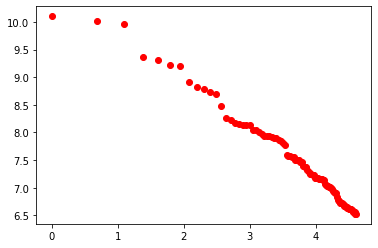

In [8]:
generateZipfsPlot(' '.join(data_recent["comment"]))

## Complete Data : Zipf's Law

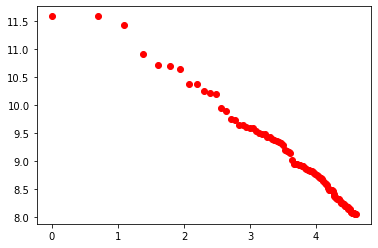

In [9]:
generateZipfsPlot(' '.join(data["comment"]))

Both the curves take and approximate shape of log-log curve.

## Hypothesis testing of Zipf's Law

In [10]:
comments = ' '.join(data_recent['comment'])
tokens = word_tokenize(comments)
word_count = collections.Counter(tokens)

token_df = pd.DataFrame.from_records(list(dict(word_count).items()), columns=['word','count'])
token_df.shape

(21696, 2)

In [11]:
token_df.sort_values(by='count', ascending=False, inplace=True)

In [12]:
token_df['rank'] = token_df['count'].rank(method='max', ascending=False)
token_df.head()

,word,count,rank
9,the,24385,1.0
7,",",22281,2.0
2,.,21189,3.0
14,a,11626,4.0
59,i,11120,5.0


In [13]:
n = token_df.shape[0]
lowest_freq = min(token_df['count'])

In [14]:
token_df['log_rank'] = token_df['rank'].apply(lambda x : math.log(x))

In [15]:
token_df['x'] = token_df['count'].apply(lambda x : math.log(x/(n*lowest_freq)))

In [16]:
token_df.head()

,word,count,rank,log_rank,x
9,the,24385,1.0,0.000000,0.116840
7,",",22281,2.0,0.693147,0.026606
2,.,21189,3.0,1.098612,-0.023646
14,a,11626,4.0,1.386294,-0.623884
59,i,11120,5.0,1.609438,-0.668383


In [17]:
import statsmodels.api as sm

Y = token_df['log_rank']
X = token_df['x']
model = sm.OLS(Y,X)
results = model.fit()

In [18]:
results.conf_int(alpha=0.05, cols=None)

,0,1
x,-1.0131,-1.012257


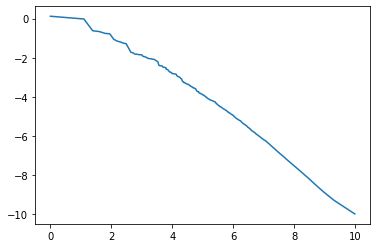

In [19]:
plt.plot(token_df['log_rank'], token_df['x'])

# Task B: Find the top 10 brands from frequency counts. You will need to write a script to count the frequencies of words ( stopwords should NOT be counted). Replace frequently occurring car models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. A list of model and brand names (not exhaustive) are provided in a separate file.

## Stopwords Removal

In [20]:
def removeStopwords(text):
    text = removePunctuations(text)
    cachedStopWords = stopwords.words("english")
    cachedStopWords.extend(['car'])
    print(cachedStopWords)
    for sw in cachedStopWords:
        text = re.sub(' '+sw+' ', ' ', text)
    return text

## Replace models of brands with brands

In [21]:
def replace_all(text, dic):
    text = removePunctuations(text)
    for model, brand in dic:
        text = re.sub(' '+model+' ', ' '+brand+' ', text)
    
    return text

In [22]:
model_brands = pd.read_csv("car models and brands.csv")
model_brands.drop_duplicates(inplace = True)

# converting dataframe to dict
model_brands_list = list(zip(model_brands['Model'], model_brands['Brand']))

# replacing models with brand names
text = replace_all(' '.join(data_recent['comment']), model_brands_list)

# tokenizing words from replaced text
filtered_word_count = collections.Counter(word_tokenize(text))

word_count_df = pd.DataFrame.from_records(list(dict(filtered_word_count).items()), columns=['word', 'count'])

word_count_df = word_count_df.sort_values(by='count', ascending=False)


In [44]:
top_10_brands = word_count_df.merge(pd.DataFrame({'word': model_brands['Brand'].unique()}), on = 'word', how = 'inner')[:10]['word']
top_10_brands

0          audi
1           bmw
2         acura
3         honda
4    volkswagen
5      cadillac
6      infiniti
7      mercedes
8       hyundai
9        toyota
Name: word, dtype: object

## Task C: Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post. 

In [24]:
data_recent['clean_comment'] = data_recent['comment'].apply(lambda x : replace_all(x, model_brands_list))

for brand in top_10_brands:
    data_recent[brand] = data_recent['clean_comment'].str.contains(brand)

c:\users\mehen\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [25]:
data_recent

,date,comment,clean_comment,audi,bmw,acura,honda,volkswagen,cadillac,infiniti,mercedes,hyundai,toyota
16713,2014-02-26 21:51:00,"'02 rx300. gonna sit back, smell the oil and c...",'02 rx300 gonna sit back smell the oil and chi...,False,False,False,False,False,False,False,False,False,False
16714,2014-02-27 02:45:00,@markcincinnati - like i mentioned i got the 1...,@markcincinnati - like i mentioned i got the 1...,True,False,False,False,False,False,False,False,False,False
16715,2014-02-27 02:57:00,@stickguy i like the new feature to add pix- b...,@stickguy i like the new feature to add pix- b...,False,False,False,False,False,False,False,False,False,False
16716,2014-02-27 14:59:00,"@sweendogy: i read an article about the ""indiv...","@sweendogy: i read an article about the ""indiv...",True,False,True,False,False,False,True,False,False,True
16717,2014-02-27 15:08:00,my wife's mazda cx-7 does that as well ... wil...,my wife's mazda mazda does that as well will ...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21728,2020-07-26 22:42:00,there's speculation that the ilx name might be...,there's speculation that the acura name might ...,False,False,True,False,False,False,False,False,False,False
21729,2020-07-26 22:47:00,"if they won't bring back integra, the rsx is a...",if they won't bring back acura the acura is a ...,False,False,True,False,False,False,False,False,False,False
21730,2020-07-26 22:54:00,"yes, i'd like to see acura bring back a hatchb...",yes i'd like to see acura bring back a hatchba...,False,False,True,False,False,False,False,False,False,False
21731,2021-05-06 01:35:00,@explorerx4 : how do you like your lincoln mkz...,@explorerx4 : how do you like your lincoln mkz...,False,False,False,False,False,False,False,False,False,False


In [26]:
dataset = data_recent[top_10_brands].reset_index(drop = True)

In [27]:
dataset

,audi,bmw,acura,honda,volkswagen,cadillac,infiniti,mercedes,hyundai,toyota
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,True,False,False,False,False,False,False,False
4996,False,False,True,False,False,False,False,False,False,False
4997,False,False,True,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [28]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

In [29]:
# te = TransactionEncoder()
# te_ary = te.fit(dataset).transform(dataset)
# df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpgrowth(dataset, min_support=0.0001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bmw),(audi),0.2116,0.1720,0.0724,0.342155,1.989273,0.036005,1.258655
1,(audi),(bmw),0.1720,0.2116,0.0724,0.420930,1.989273,0.036005,1.361494
2,(acura),(audi),0.1060,0.1720,0.0378,0.356604,2.073278,0.019568,1.286921
3,(audi),(acura),0.1720,0.1060,0.0378,0.219767,2.073278,0.019568,1.145812
4,(bmw),(acura),0.2116,0.1060,0.0334,0.157845,1.489104,0.010970,1.061562


In [30]:
def keepRows(x):
    if len(x['antecedents']) == 1 and len(x['consequents']) == 1:
        return True
    return False
rules['keep'] = rules.apply(lambda x : keepRows(x), axis = 1)

In [31]:
rules_association = rules[rules['keep']].sort_values(by='lift', ascending=False).reset_index(drop = True)
rules_association['lift'] = rules_association['lift'].apply(lambda x : round(x,4))
# rules_association.drop_duplicates(subset=['lift'], inplace=True)
rules_association['antecedents'] = rules_association['antecedents'].apply(lambda x : list(x)[0])
rules_association['consequents'] = rules_association['consequents'].apply(lambda x : list(x)[0])

rules_association.sort_values(by=['lift','antecedents', 'consequents'], ascending=False, inplace=True)

In [32]:
# df.pivot(index='patient', columns='obs', values='score')

rules_association_table = rules_association.pivot(index = 'antecedents', columns = 'consequents', values = 'lift').fillna(1)


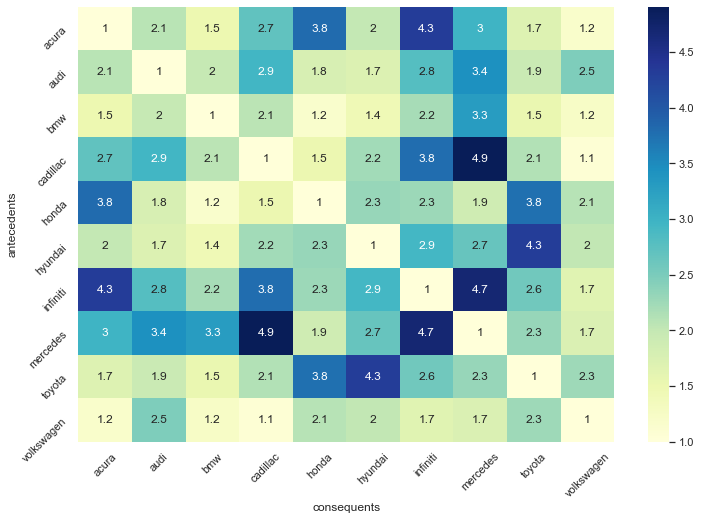

In [33]:
import seaborn as sns; sns.set_theme()

plt.figure(figsize=[12,8])
sns.heatmap(rules_association_table, annot=True, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# Task D: Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on GitHub). 

For calculating MDS, converting lift values to dissimilarities

$$Dissimilarity = 1/Lift$$


In [34]:
disimiliarty_df = rules_association_table.rdiv(1).round(4)

In [35]:
mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=50,
                   dissimilarity="precomputed", n_jobs=1)
points = mds.fit(disimiliarty_df).embedding_

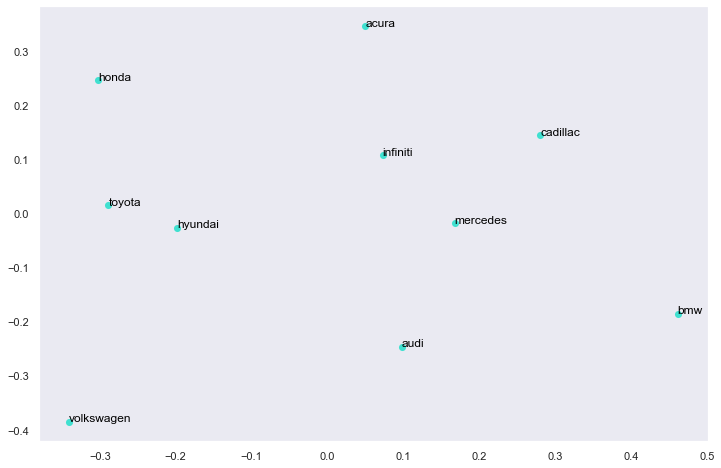

In [37]:
plt.figure(facecolor=(1, 1, 1), figsize=[12,8])
plt.scatter(points[:, 0], points[:, 1], color='turquoise', s=50, lw=0, label='MDS')

# Add labels
for i in range(disimiliarty_df.shape[0]):
    plt.annotate(disimiliarty_df.index[i], (points[i,0], points[i,1]), color='black')

# Hide grid lines
plt.grid(False)
plt.show()

# Task F: What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

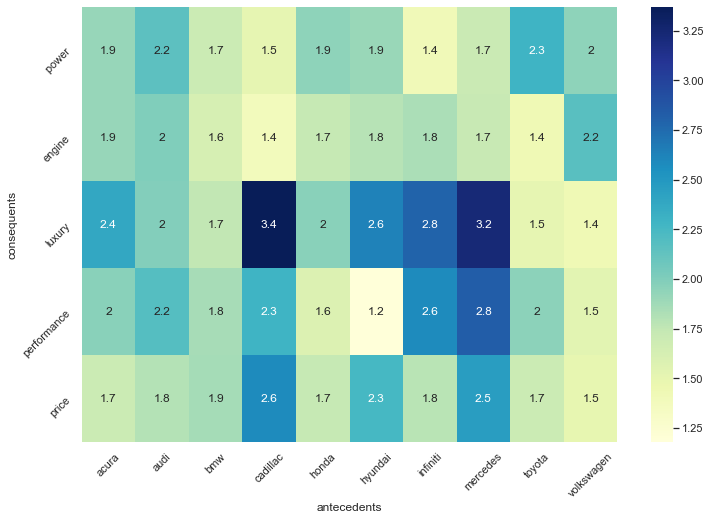

In [49]:
top_10_attributes = ['performance', 'engine', 'luxury', ' power', 'price']

for attr in top_10_attributes:
    data_recent[attr] = data_recent['clean_comment'].str.contains(attr)

dataset = data_recent[top_10_attributes+list(top_10_brands)].reset_index(drop = True)

frequent_itemsets = fpgrowth(dataset, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")

rules['keep'] = rules.apply(lambda x : keepRows(x), axis = 1)

rules_association = rules[rules['keep']].sort_values(by='lift', ascending=False).reset_index(drop = True)
rules_association['antecedents'] = rules_association['antecedents'].apply(lambda x : list(x)[0])
rules_association['consequents'] = rules_association['consequents'].apply(lambda x : list(x)[0])
rules_association['lift'] = rules_association['lift'].apply(lambda x : round(x,4))
rules_association.sort_values(by=['lift'], ascending=False, inplace=True)


rules_association['consAttr'] = rules_association['consequents'].apply(lambda x : x in top_10_attributes)
rules_association = rules_association[rules_association['consAttr']]
rules_association['antBrand'] = rules_association['antecedents'].apply(lambda x : x in list(top_10_brands))
rules_association = rules_association[rules_association['antBrand']]
rules_association.shape

rules_association_table = rules_association.pivot(columns = 'antecedents', index = 'consequents', values = 'lift').fillna(1)

plt.figure(figsize=[12,8])
sns.heatmap(rules_association_table, annot=True, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

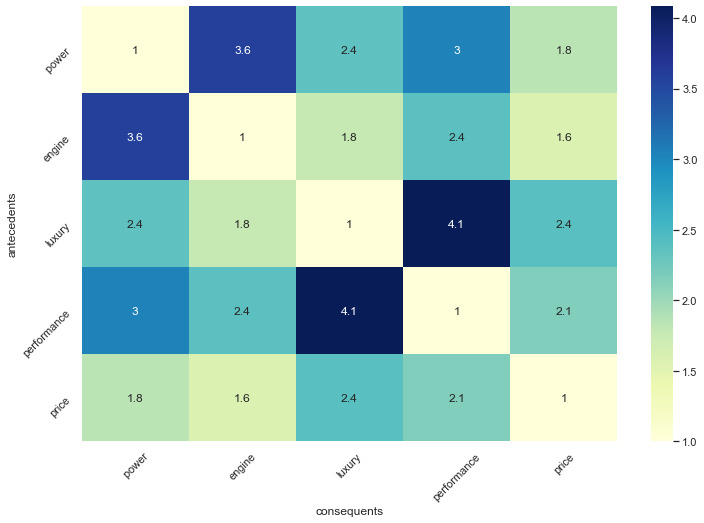

In [47]:
top_10_attributes = ['performance', 'engine', 'luxury', ' power', 'price']

for attr in top_10_attributes:
    data_recent[attr] = data_recent['clean_comment'].str.contains(attr)

dataset = data_recent[top_10_attributes].reset_index(drop = True)

frequent_itemsets = fpgrowth(dataset, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")

rules['keep'] = rules.apply(lambda x : keepRows(x), axis = 1)

rules_association = rules[rules['keep']].sort_values(by='lift', ascending=False).reset_index(drop = True)
rules_association['antecedents'] = rules_association['antecedents'].apply(lambda x : list(x)[0])
rules_association['consequents'] = rules_association['consequents'].apply(lambda x : list(x)[0])
rules_association['lift'] = rules_association['lift'].apply(lambda x : round(x,4))
rules_association.sort_values(by=['lift'], ascending=False, inplace=True)

rules_association_table = rules_association.pivot(index = 'antecedents', columns = 'consequents', values = 'lift').fillna(1)

plt.figure(figsize=[12,8])
sns.heatmap(rules_association_table, annot=True, cmap="YlGnBu")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [42]:
data_recent.head()['comment'].str.findall('(' + '|'.join(['mark']) + ')')

16713        []
16714    [mark]
16715        []
16716        []
16717        []
Name: comment, dtype: object